In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv("gurgaon_properties_missing_value_imputation.csv")

In [5]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 14,5.00,22222.0,3.0,3.0,3,1.0,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1,flat,la vida by tata housing,sector 113,2.78,10335.0,3.0,4.0,3+,5.0,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,220.0
2,house,dlf city plots phase 3,sector 24,1.44,2963.0,4.0,2.0,2,1.0,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,house,independent,sector 4,0.65,10317.0,1.0,1.0,1,1.0,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,21.0
4,flat,experion windchants,sector 112,3.29,11742.0,3.0,3.0,3+,2.0,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,192.0


In [7]:
train_df=df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,sector 14,5.00,3.0,3.0,3,1.0,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1,flat,sector 113,2.78,3.0,4.0,3+,5.0,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,220.0
2,house,sector 24,1.44,4.0,2.0,2,1.0,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,house,sector 4,0.65,1.0,1.0,1,1.0,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,21.0
4,flat,sector 112,3.29,3.0,3.0,3+,2.0,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,192.0


C:\Users\sk531\AppData\Local\Temp\ipykernel_22320\663931128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

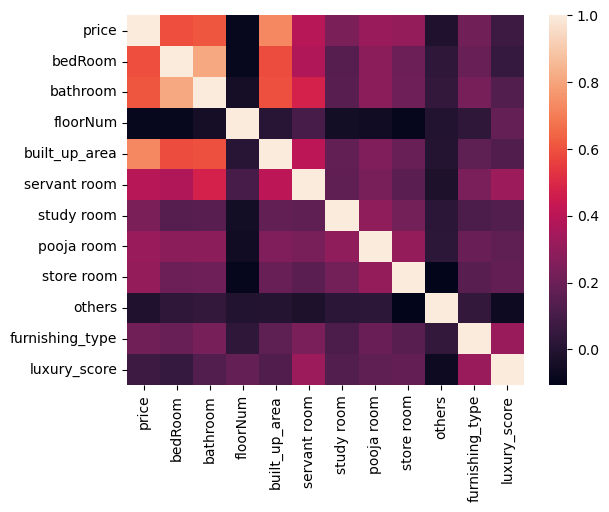

In [9]:
sns.heatmap(train_df.corr())

In [10]:
train_df.corr()['price'].sort_values(ascending=False)

C:\Users\sk531\AppData\Local\Temp\ipykernel_22320\897562334.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()['price'].sort_values(ascending=False)


price              1.000000
built_up_area      0.725987
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.215129
luxury_score       0.069606
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64

In [11]:
# cols in quesiton

# categorical ->property_type,sector,agePossession
# numerical -> luxury_score,others,floorNum


In [12]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'servant room', 'study room', 'pooja room',
       'store room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

###  luxury score

<Axes: xlabel='luxury_score'>

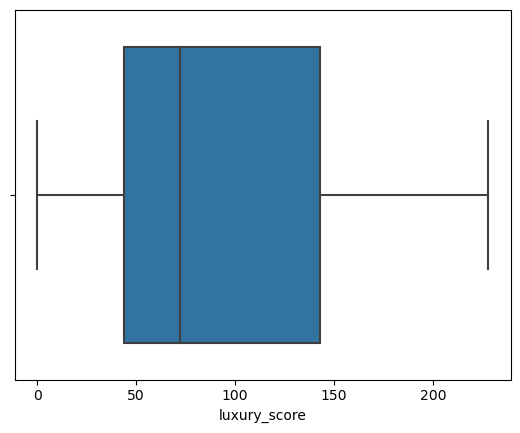

In [13]:
sns.boxplot(x=df['luxury_score'])

In [14]:
def categorize_luxury(score):
    if 0<=score<60:
        return "Low"
    elif 60<=score<160:
        return "Medium"
    else:
        return "High"
     
    

In [15]:
train_df['luxury_category']=train_df['luxury_score'].apply(categorize_luxury)

In [16]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 14,5.00,3.0,3.0,3,1.0,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Low
1,flat,sector 113,2.78,3.0,4.0,3+,5.0,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,220.0,High
2,house,sector 24,1.44,4.0,2.0,2,1.0,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
3,house,sector 4,0.65,1.0,1.0,1,1.0,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,21.0,Low
4,flat,sector 112,3.29,3.0,3.0,3+,2.0,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,192.0,High


### floorNum

<Axes: xlabel='floorNum'>

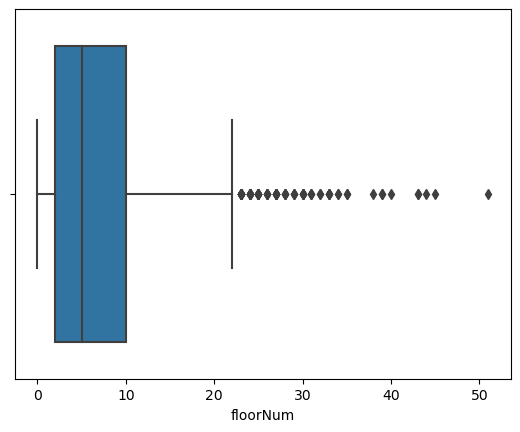

In [17]:
sns.boxplot(x=df['floorNum'])

In [18]:
def categorize_floor(floor):
    if 0<=floor<=2:
        return "Low Floor"
    elif 3<=floor<=10:
        return "Mid Floor"
    elif 11<=floor<=51:
        return "High Floor"
    else:
        return None

In [19]:
train_df['floor_category']=train_df['floorNum'].apply(categorize_floor)

In [20]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 14,5.00,3.0,3.0,3,1.0,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,30.0,Low,Low Floor
1,flat,sector 113,2.78,3.0,4.0,3+,5.0,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,220.0,High,Mid Floor
2,house,sector 24,1.44,4.0,2.0,2,1.0,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
3,house,sector 4,0.65,1.0,1.0,1,1.0,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,21.0,Low,Low Floor
4,flat,sector 112,3.29,3.0,3.0,3+,2.0,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,192.0,High,Low Floor


In [21]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [22]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,house,sector 14,5.00,3.0,3.0,3,Moderately Old,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 113,2.78,3.0,4.0,3+,Relatively New,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,High,Mid Floor
2,house,sector 24,1.44,4.0,2.0,2,Old Property,540.00,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
3,house,sector 4,0.65,1.0,1.0,1,Moderately Old,70.00,0.0,0.0,0.0,0.0,1.0,0.0,Low,Low Floor
4,flat,sector 112,3.29,3.0,3.0,3+,Relatively New,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,High,Low Floor


In [23]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of the original data for label encoding 

data_label_encoded=train_df.copy()

categorical_cols=train_df.select_dtypes(include=['object']).columns


# apply label encoding to categorical columns :

for col in categorical_cols:
    oe=OrdinalEncoder()
    data_label_encoded[col]=oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# splitting the dataset into training and testing sets 
    
X_label=data_label_encoded.drop('price',axis=1)
y_label =data_label_encoded['price']



# We applied ordinal encoding to categorical column but it wont affect(tree based model) unless we apply techniques that dont give importance to value as thay do cuts ,but lineraRegrssion model will create the problem for us  (linear based model)and to apply linearly models only way is to do on hot encoding 


[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [24]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,1.0,20.0,3.0,3.0,3.0,0.0,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,17.0,3.0,4.0,4.0,3.0,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.0,29.0,4.0,2.0,2.0,2.0,540.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,47.0,1.0,1.0,1.0,0.0,70.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,16.0,3.0,3.0,4.0,3.0,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,73.0,3.0,3.0,4.0,1.0,1556.00,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
3550,0.0,82.0,3.0,3.0,3.0,0.0,1466.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
3551,0.0,73.0,3.0,3.0,3.0,3.0,1833.00,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
3552,0.0,3.0,3.0,3.0,4.0,0.0,1945.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [25]:
y_label

0       5.00
1       2.78
2       1.44
3       0.65
4       3.29
        ... 
3549    1.95
3550    0.98
3551    2.35
3552    0.85
3553    2.45
Name: price, Length: 3554, dtype: float64

## Feature Selection

### Technique -1  Correlation Analysis 

<Axes: >

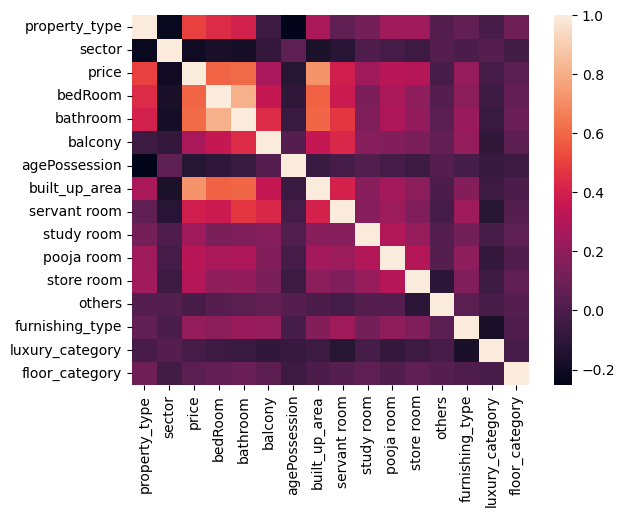

In [26]:
sns.heatmap(data_label_encoded.corr())

In [27]:
# price ka baki sare column ke sath relationship dekhte hai :

fi_df1=data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.124283
6,built_up_area,0.725987
7,servant room,0.391930
8,study room,0.242955
9,pooja room,0.319852


### Technique 2 - Random Forest Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor on the label encoded data :Tree based algos.have a feature inherintly that gives feature importance 

rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_label,y_label)

# extract feature importance scores from labeled encoded data :

fi_df2=pd.DataFrame({
    'feature':X_label.columns,
    'rf_importance':rf_label.feature_importances_
}).sort_values(by='rf_importance',ascending=False)
fi_df2

,feature,rf_importance
6,built_up_area,0.646178
0,property_type,0.106702
1,sector,0.104835
3,bathroom,0.026962
2,bedRoom,0.023244
7,servant room,0.020794
5,agePossession,0.015058
4,balcony,0.013066
13,luxury_category,0.008175
8,study room,0.007584


### Technique 3 - Gradient Boosting Feature importances

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gb_label=GradientBoostingRegressor()
gb_label.fit(X_label,y_label)


# Extract feature importance score for labeled encoded  data 

fi_d3=pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance':gb_label.feature_importances_
}).sort_values(by='gb_importance',ascending=False)
fi_d3


,feature,gb_importance
6,built_up_area,0.678328
0,property_type,0.099921
1,sector,0.099563
2,bedRoom,0.036006
3,bathroom,0.034552
7,servant room,0.030590
10,store room,0.008126
5,agePossession,0.005574
12,furnishing_type,0.002012
8,study room,0.001641


### Technique 4 - Permutation Importance

In [30]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split



X_train_label,X_test_label,y_train_label,y_test_label=train_test_split(X_label,y_label,test_size=0.2,random_state=42)

# train a random forest regressor on label encoded data :
rf_label=RandomForestRegressor(n_estimators=100,random_state=42)
rf_label.fit(X_train_label,y_train_label)

# calulate the premutaion importance :

perm_importance=permutation_importance(rf_label,X_test_label,y_test_label,n_repeats=30,random_state=42)
# repeat the work 30 times 

# orgainse the result into a Dataframe 
fi_d4=pd.DataFrame({
    'feature':X_label.columns,
    'permutation_importance':perm_importance.importances_mean
}).sort_values(by='permutation_importance',ascending=False)

fi_d4



# permutation importance :

# we suppose have 3 features and we make 2 features constant and other 1 we jumble the values of the rows ,so if we change the values of 1 feature it will make the value of our target dirty now if we train again on jumbled value and same target and if we get the score less so we can say that f1 is imp and contribute to us ,-ve value indicates on removing that feature the score will increase 

,feature,permutation_importance
6,built_up_area,0.689962
0,property_type,0.168744
1,sector,0.124507
2,bedRoom,0.023414
7,servant room,0.016519
3,bathroom,0.013671
8,study room,0.010771
9,pooja room,0.006768
5,agePossession,0.004869
13,luxury_category,0.004422


### Techinque 5 -LASSO


In [31]:
# we use linear model here even thought we converted some categorical to ordinal data 

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler 

scaler =StandardScaler()
X_scaled=scaler.fit_transform(X_label)

# Train a Lasso regression model 
# We will use a relatively small value for alpha(the regularization strength )for demonstration process 
lasso=Lasso(alpha=0.01,random_state=42)
lasso.fit(X_scaled,y_label)

# extra coefficient :

fi_d5=pd.DataFrame({
    'feature':X_label.columns,
    'lasso_coeff':lasso.coef_
}).sort_values(by='lasso_coeff',ascending=False)
fi_d5
# sector play vital role but this say last so it not correct as it was categorical before and we applied linear regression so that the issue

,feature,lasso_coeff
6,built_up_area,1.400902
0,property_type,0.723331
3,bathroom,0.297019
10,store room,0.210807
7,servant room,0.207240
8,study room,0.169940
12,furnishing_type,0.139333
13,luxury_category,0.091682
9,pooja room,0.071890
2,bedRoom,0.067301


### Technique 6 Recursive feature elemination(RFE)

In [32]:
from sklearn.feature_selection import RFE

# initialise the base estimator :

estimator=RandomForestRegressor()

# Apply RFE  on the label encoded and standardized training data 

selector_label=RFE(estimator,n_features_to_select=X_label.shape[1],step=1)
selector_label=selector_label.fit(X_label,y_label)

# get selected features based on RFE 
selected_features=X_label.columns[selector_label.support_]

# extract the coeeficients for the selected features from the underlying linear regression model 

selected_coefficients =selector_label.estimator_.feature_importances_

# orgainsie the result into a df

fi_df6=pd.DataFrame({
    'feature':selected_features,
    'rfe_score':selected_coefficients
}).sort_values(by='rfe_score',ascending=False)

fi_df6

# ek ko hate te hai fir train karte hai model ko ,fir 2 ko fir 3 ko and so on hum remove karte jate hai ,one of the best method so the output is quite reliable 


,feature,rfe_score
6,built_up_area,0.648093
1,sector,0.105552
0,property_type,0.101600
2,bedRoom,0.025942
3,bathroom,0.025093
7,servant room,0.020024
5,agePossession,0.015084
4,balcony,0.012931
13,luxury_category,0.008773
8,study room,0.008163


### Technique 7 -Linear Regression Weights 

In [33]:
# training a linear regression model on the label-encoded and standardized training data 

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_scaled,y_label)

# Extract coefficients:

fi_df7=pd.DataFrame({
    'feature':X_label.columns,
    'reg_coeffs':lin_reg.coef_
}).sort_values(by='reg_coeffs',ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.404059
0,property_type,0.720371
3,bathroom,0.304009
7,servant room,0.216191
10,store room,0.215723
8,study room,0.178285
12,furnishing_type,0.149268
13,luxury_category,0.103238
9,pooja room,0.075534
2,bedRoom,0.069871


### Technique 8 - SHAP

In [34]:
!pip install shap


In [35]:
import shap

# compute SHAP values using the trained Random Forest model 

rf=RandomForestRegressor(n_estimators= 100,random_state=42 )
rf.fit(X_label,y_label)

explainer=shap.TreeExplainer(rf)

shap_values=explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance 

shape_sum=np.abs(shap_values).mean(axis=0)
shap_values

array([[ 1.35573897e+00, -6.08595085e-02, -3.84542958e-04, ...,
        -3.56703569e-02, -4.16899921e-03, -3.34128965e-02],
       [-4.25840101e-01,  1.64858644e-01, -1.28888659e-02, ...,
        -6.59442177e-02,  1.30354081e-02, -5.92277120e-02],
       [ 4.98324241e-01,  1.63808855e-01,  3.05455917e-01, ...,
        -1.49931980e-02, -7.95878103e-03, -1.62616668e-02],
       ...,
       [-4.02499346e-01,  6.01928386e-01, -2.36432124e-02, ...,
         8.16362277e-03, -2.38023474e-02, -4.74547953e-02],
       [-5.04301665e-01, -6.29080653e-01, -5.72447385e-02, ...,
        -1.49637273e-02, -1.00412297e-02, -2.72897614e-02],
       [-2.63347248e-01,  7.09192422e-02, -1.47347697e-02, ...,
        -8.43721216e-03,  1.99878358e-02,  6.83314899e-02]])

In [36]:
shap_values

array([[ 1.35573897e+00, -6.08595085e-02, -3.84542958e-04, ...,
        -3.56703569e-02, -4.16899921e-03, -3.34128965e-02],
       [-4.25840101e-01,  1.64858644e-01, -1.28888659e-02, ...,
        -6.59442177e-02,  1.30354081e-02, -5.92277120e-02],
       [ 4.98324241e-01,  1.63808855e-01,  3.05455917e-01, ...,
        -1.49931980e-02, -7.95878103e-03, -1.62616668e-02],
       ...,
       [-4.02499346e-01,  6.01928386e-01, -2.36432124e-02, ...,
         8.16362277e-03, -2.38023474e-02, -4.74547953e-02],
       [-5.04301665e-01, -6.29080653e-01, -5.72447385e-02, ...,
        -1.49637273e-02, -1.00412297e-02, -2.72897614e-02],
       [-2.63347248e-01,  7.09192422e-02, -1.47347697e-02, ...,
        -8.43721216e-03,  1.99878358e-02,  6.83314899e-02]])

In [37]:
fi_df8=pd.DataFrame({
    'feature':X_label.columns,
    'SHAP_score':np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score',ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.240201
0,property_type,0.479250
1,sector,0.396201
3,bathroom,0.123756
7,servant room,0.097169
2,bedRoom,0.051989
4,balcony,0.041965
5,agePossession,0.027866
14,floor_category,0.022408
12,furnishing_type,0.019489


In [39]:
final_fi_df=fi_df1.merge(fi_df2,on='feature').merge(fi_d3,on='feature').merge(fi_d4,on='feature').merge(fi_d5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.104835,0.099563,0.124507,-0.065100,0.105552,-0.074089,0.396201
bedRoom,0.591289,0.023244,0.036006,0.023414,0.067301,0.025942,0.069871,0.051989
bathroom,0.609777,0.026962,0.034552,0.013671,0.297019,0.025093,0.304009,0.123756
balcony,0.269637,0.013066,0.001525,0.004149,-0.029813,0.012931,-0.052153,0.041965
agePossession,-0.124283,0.015058,0.005574,0.004869,-0.013267,0.015084,-0.020725,0.027866
built_up_area,0.725987,0.646178,0.678328,0.689962,1.400902,0.648093,1.404059,1.240201
servant room,0.391930,0.020794,0.030590,0.016519,0.207240,0.020024,0.216191,0.097169
study room,0.242955,0.007584,0.001641,0.010771,0.169940,0.008163,0.178285,0.017765
pooja room,0.319852,0.005098,0.000000,0.006768,0.071890,0.005399,0.075534,0.009661


In [40]:
# normalize the score 
# axis =0 sums across the vertical direction 

#                Feature_X  Feature_Y  Feature_Z  Feature_W
# Observation 1     10         20         15         5
# Observation 2     15         25         20         10
# Observation 3     20         30         25         15

#                Feature_X  Feature_Y  Feature_Z  Feature_W
# Observation 1     10/45      20/75      15/60      5/30
# Observation 2     15/45      25/75      20/60      10/30
# Observation 3     20/45      30/75      25/60      15/30


final_fi_df=final_fi_df.divide(final_fi_df.sum(axis=0),axis=1)


In [41]:
final_fi_df.columns

Index(['corr_coeff', 'rf_importance', 'gb_importance',
       'permutation_importance', 'lasso_coeff', 'rfe_score', 'reg_coeffs',
       'SHAP_score'],
      dtype='object')

In [44]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.711234
sector             0.134630
bathroom           0.034193
bedRoom            0.029145
servant room       0.028883
agePossession      0.011717
balcony            0.011085
study room         0.007966
store room         0.007250
luxury_category    0.006624
furnishing_type    0.005338
floor_category     0.004998
pooja room         0.004767
others             0.002170
dtype: float64

In [45]:
# to drop others , pooja room  ,study room 
# but we cant simply remove it we have to proof its unimportance 
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_category,floor_category
0,1.0,20.0,3.0,3.0,3.0,0.0,2250.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,17.0,3.0,4.0,4.0,3.0,2350.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,1.0,29.0,4.0,2.0,2.0,2.0,540.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,47.0,1.0,1.0,1.0,0.0,70.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,0.0,16.0,3.0,3.0,4.0,3.0,2225.56,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,73.0,3.0,3.0,4.0,1.0,1556.00,0.0,0.0,0.0,1.0,0.0,2.0,2.0,1.0
3550,0.0,82.0,3.0,3.0,3.0,0.0,1466.00,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0
3551,0.0,73.0,3.0,3.0,3.0,3.0,1833.00,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0
3552,0.0,3.0,3.0,3.0,4.0,0.0,1945.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [46]:
# with all cols 

from sklearn.model_selection import cross_val_score

rf=RandomForestRegressor(n_estimators=100,random_state=42)

scores=cross_val_score(rf,X_label,y_label,cv=5,scoring='r2')

# The cv=5 parameter specifies the number of folds (or subsets) in the cross-validation process. Here, 5-fold cross-validation is performed.




In [48]:
scores.mean()

0.8028023683143266

In [54]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

scores=cross_val_score(rf,X_label.drop(columns=[ 'others' , 'pooja room'  ,'floor_category']),y_label,cv=5,scoring='r2')
 

In [57]:
scores.mean()

0.804408721466759

In [58]:
# export_df=X_label.drop(columns=[ 'others' , 'pooja room'  ,'floor_category'])
export_df=X_label.drop(columns=[ 'others' , 'pooja room'  ,'study room'])

export_df['price']=y_label


In [59]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv',index=False)


In [60]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,study room,store room,furnishing_type,luxury_category,price
0,1.0,20.0,3.0,3.0,3.0,0.0,2250.00,0.0,0.0,0.0,0.0,1.0,5.00
1,0.0,17.0,3.0,4.0,4.0,3.0,2350.00,1.0,0.0,0.0,0.0,0.0,2.78
2,1.0,29.0,4.0,2.0,2.0,2.0,540.00,0.0,0.0,0.0,0.0,1.0,1.44
3,1.0,47.0,1.0,1.0,1.0,0.0,70.00,0.0,0.0,0.0,0.0,1.0,0.65
4,0.0,16.0,3.0,3.0,4.0,3.0,2225.56,1.0,0.0,0.0,2.0,0.0,3.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,73.0,3.0,3.0,4.0,1.0,1556.00,0.0,0.0,1.0,2.0,2.0,1.95
3550,0.0,82.0,3.0,3.0,3.0,0.0,1466.00,0.0,1.0,0.0,0.0,2.0,0.98
3551,0.0,73.0,3.0,3.0,3.0,3.0,1833.00,1.0,1.0,0.0,2.0,0.0,2.35
3552,0.0,3.0,3.0,3.0,4.0,0.0,1945.00,1.0,0.0,0.0,0.0,1.0,0.85
